In [27]:
import numpy as np
import pandas as pd
import scipy.signal as signal
import pandas as pd
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import glob
from torch.utils.data import Dataset, DataLoader
from datetime import datetime
import os
import random
import seaborn as sns

In [2]:
eeg_signals = ['EEG 1',
               'EEG 2',
               'EEG 3',
               'EEG 4',
               'EEG 5',
               'EEG 6',
               'EEG 7',
               'EEG 8']

In [3]:
brain_bands = ['EEG 1_theta',
               'EEG 2_theta',
               'EEG 3_theta',
               'EEG 4_theta',
               'EEG 5_theta',
               'EEG 6_theta',
               'EEG 7_theta',
               'EEG 8_theta',
               'EEG 1_alpha',
               'EEG 2_alpha',
               'EEG 3_alpha',
               'EEG 4_alpha',
               'EEG 5_alpha',
               'EEG 6_alpha',
               'EEG 7_alpha',
               'EEG 8_alpha',
               'EEG 1_beta',
               'EEG 2_beta',
               'EEG 3_beta',
               'EEG 4_beta',
               'EEG 5_beta',
               'EEG 6_beta',
               'EEG 7_beta',
               'EEG 8_beta',
               'EEG 1_gamma',
               'EEG 2_gamma',
               'EEG 3_gamma',
               'EEG 4_gamma',
               'EEG 5_gamma',
               'EEG 6_gamma',
               'EEG 7_gamma',
               'EEG 8_gamma']

In [9]:
mean_std = ['EEG 1_theta_mean',
            'EEG 1_theta_std',
            'EEG 2_theta_mean',
            'EEG 2_theta_std',
            'EEG 3_theta_mean',
            'EEG 3_theta_std',
            'EEG 4_theta_mean',
            'EEG 4_theta_std',
            'EEG 5_theta_mean',
            'EEG 5_theta_std',
            'EEG 6_theta_mean',
            'EEG 6_theta_std',
            'EEG 7_theta_mean',
            'EEG 7_theta_std',
            'EEG 8_theta_mean',
            'EEG 8_theta_std',
            'EEG 1_alpha_mean',
            'EEG 1_alpha_std',
            'EEG 2_alpha_mean',
            'EEG 2_alpha_std',
            'EEG 3_alpha_mean',
            'EEG 3_alpha_std',
            'EEG 4_alpha_mean',
            'EEG 4_alpha_std',
            'EEG 5_alpha_mean',
            'EEG 5_alpha_std',
            'EEG 6_alpha_mean',
            'EEG 6_alpha_std',
            'EEG 7_alpha_mean',
            'EEG 7_alpha_std',
            'EEG 8_alpha_mean',
            'EEG 8_alpha_std',
            'EEG 1_beta_mean',
            'EEG 1_beta_std',
            'EEG 2_beta_mean',
            'EEG 2_beta_std',
            'EEG 3_beta_mean',
            'EEG 3_beta_std',
            'EEG 4_beta_mean',
            'EEG 4_beta_std',
            'EEG 5_beta_mean',
            'EEG 5_beta_std',
            'EEG 6_beta_mean',
            'EEG 6_beta_std',
            'EEG 7_beta_mean',
            'EEG 7_beta_std',
            'EEG 8_beta_mean',
            'EEG 8_beta_std',
            'EEG 1_gamma_mean',
            'EEG 1_gamma_std',
            'EEG 2_gamma_mean',
            'EEG 2_gamma_std',
            'EEG 3_gamma_mean',
            'EEG 3_gamma_std',
            'EEG 4_gamma_mean',
            'EEG 4_gamma_std',
            'EEG 5_gamma_mean',
            'EEG 5_gamma_std',
            'EEG 6_gamma_mean',
            'EEG 6_gamma_std',
            'EEG 7_gamma_mean',
            'EEG 7_gamma_std',
            'EEG 8_gamma_mean',
            'EEG 8_gamma_std']

In [4]:
# Define the notch filter parameters
def notch_filter(data, fs=250, freq=50, quality_factor=30):
    b, a = signal.iirnotch(w0=freq, Q=quality_factor, fs=fs)
    return signal.filtfilt(b, a, data)



In [5]:
def notch_df_filter(df):
    fs = 250  # Sampling frequency of the EEG signals
    for col in df.columns:
        df[col] = notch_filter(df[col], fs=fs, freq=50)
    return df

In [6]:
def bandpass_filter(data, low, high, fs=250, order=5):
    nyquist = 0.5 * fs
    low = low / nyquist
    high = high / nyquist
    b, a = signal.butter(order, [low, high], btype='band')
    return signal.filtfilt(b, a, data)

In [7]:
bands = {
    'theta': (4, 8),
    'alpha': (8, 13),
    'beta': (13, 30),
    'gamma': (30, 45)
}


In [29]:
def extract_brain_waves(df, fs):
    filtered_df = pd.DataFrame()
    for band_name, (low, high) in bands.items():
        for col in df.columns:
            filtered_df[f'{col}_{band_name}'] = bandpass_filter(df[col], low, high, fs=fs)
    for col in filtered_df.columns:
        filtered_df[f'{col}_mean'] = filtered_df[col].mean()
        filtered_df[f'{col}_std'] = filtered_df[col].std()
    
    filtered_df = filtered_df[mean_std]
    sample = filtered_df.iloc[[0]]
    
    
    return sample

In [12]:
df = pd.read_csv(r"dataset_raw\0\relax_0.csv")
df = df[eeg_signals]
df = df[200: 2000]
df = notch_df_filter(df)
df = extract_brain_waves(df, fs=250)

In [13]:
df

,EEG 1_theta_mean,EEG 1_theta_std,EEG 2_theta_mean,EEG 2_theta_std,EEG 3_theta_mean,EEG 3_theta_std,EEG 4_theta_mean,EEG 4_theta_std,EEG 5_theta_mean,EEG 5_theta_std,...,EEG 4_gamma_mean,EEG 4_gamma_std,EEG 5_gamma_mean,EEG 5_gamma_std,EEG 6_gamma_mean,EEG 6_gamma_std,EEG 7_gamma_mean,EEG 7_gamma_std,EEG 8_gamma_mean,EEG 8_gamma_std
0,0.038817,7.543888,0.117962,32.867005,-0.000164,23.322893,-0.033314,29.742462,0.191241,17.973859,...,0.044564,17.710543,0.051532,14.361972,0.033895,9.998664,0.05007,16.631535,0.046834,17.566802


In [30]:
folder_0 = "dataset_postprocessing/0"
folder_1 = "dataset_postprocessing/1"

# Function to load all CSV files from a folder
def load_csv_from_folder(folder_path):
    data_list = []
    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            file_path = os.path.join(folder_path, file)
            df = pd.read_csv(file_path)
            data_list.append(df)
    return pd.concat(data_list, ignore_index=True) if data_list else None

In [19]:
df_0 = load_csv_from_folder(folder_0)
df_1 = load_csv_from_folder(folder_1)

In [20]:
df = pd.concat([df_0, df_1], ignore_index=True)


In [21]:
df_numeric = df.select_dtypes(include=[np.number])

In [24]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_numeric)

In [25]:
df_pca = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
df_pca['label'] = df['label']


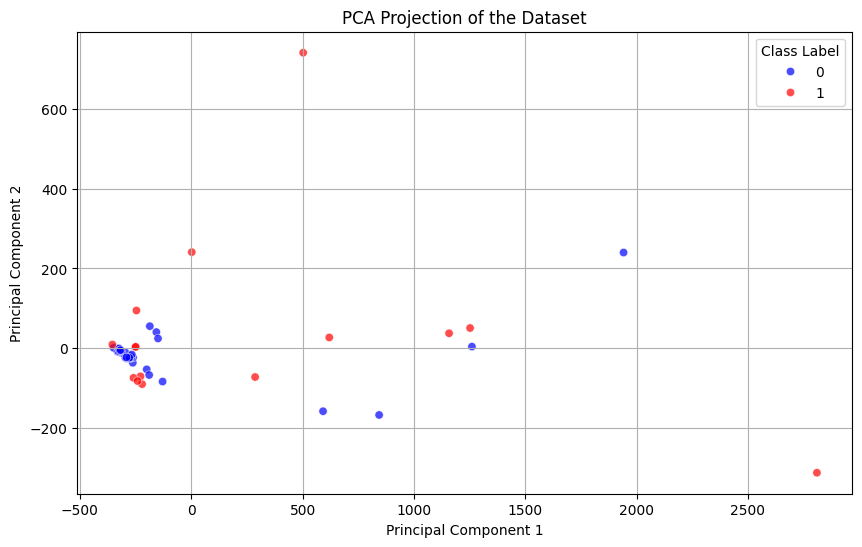

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='label', palette=['blue', 'red'], alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of the Dataset")
plt.legend(title="Class Label")
plt.grid(True)
plt.show()